# Topic Modelling

In this section, you will get a basic introduction to topic modelling with Latent Dirichlet Allocation (LDA) – a commonly used method to find topics and trends in your dataset. We will use a CSV file from our experiments, which you will produce yourself in the next weeks, too.

Topic Models are a type of statistical language models used for uncovering hidden structure in a collection of texts. you can think of it as a task of:

- tagging (what is the content of the following text?)
- clustering (what goes with what?)
- reduction (representing a text as a few snippets)

In this section, you will learn more about:
   
    Loading data
    Data cleaning
    Exploratory analysis
    Preparing data for LDA analysis
    LDA model training
    Analyzing LDA model results

In [1]:
#import packages you need:

import pandas as pd
import os
import re

In [2]:
#read file with pandas, else, you can also use the built in python fuction:

#with open('MENTAL.xlsx', r) as file:
#print(file)


df = pd.read_excel('MENTAL.xlsx')
df.head()

,Uuid,Title,Color,Shape,PositionX,PositionY,PositionZ,Group
0,06a5e138-04c4-4059-954f-4d9a05ccc8eb,Mental Health,4CAF50,Ball,-7.750854e-01,0.370025,0.213730,7
1,b75d582d-9229-4897-8072-0edffaa17927,I Am Worried About the Elderly health How To C...,907A47,Plus,-3.341778e-01,0.525397,-0.086628,7
2,df261cab-8bde-413b-89dc-a58cdeb6ffbe,Health,E0C3DD,Plus,-1.045334e+06,0.265556,0.542487,7
3,f89bb8a9-9790-4591-b25c-dfec8bbef39d,Anxiety,1C1C1C,Ball,-9.446453e-01,0.117676,0.282103,7
4,f39ecf77-ecd8-4226-8247-3b8356b1c51b,Stigma In Society,3F51B5,Diamond,-7.301590e-01,0.238134,0.479451,7


In [3]:
# Remove the columns not needed:
df = df.drop(columns=['Color', 'Shape', 'PositionX', 'PositionY', 'PositionZ'], axis=1).sample(245)

# Print out the first rows
df.head()

,Uuid,Title,Group
243,f6f8b081-3d3c-4f24-92d2-97a556990dcb,Talk With Someone,1
47,e674155f-d642-4db7-9b0f-aa8e8051ad32,Malnutrition,6
212,e89f5ce9-f1dc-4e54-bc7b-51db80d1cf19,Happy,1
140,24752dcc-184d-49ab-912d-751ba9e1130a,Bully,4
22,e7b7e061-e27e-43a1-8ec7-4fdd912f2a7d,Parents care,7


Cleaning

In [4]:
#clean the data and make it all lowercase:

df['Title'] = \
df['Title'].map(lambda x: x.lower())
df['Title'].head()

243    talk with someone
47          malnutrition
212                happy
140                bully
22          parents care
Name: Title, dtype: object

In [5]:
#import more packages for nummerical and visual analysis:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#check the column you need to work with is it clean?

df['Title']

243              talk with someone
47                    malnutrition
212                          happy
140                          bully
22                    parents care
                  ...             
160                       selflove
64                    enough sleep
214                 responsibility
23                    more funding
88     cognitive behavior treament
Name: Title, Length: 245, dtype: object

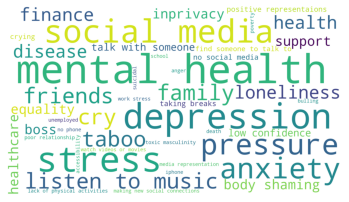

In [7]:
#create a wordcloud with a size and frequencies

text = df['Title'].value_counts().to_dict()
wc = WordCloud(background_color="white", max_words=45, width=1920, height=1080).generate_from_frequencies(text)

plt.imshow(wc)
plt.axis('off')
plt.show()

# Latent Dirichlet Allocation

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

We can describe the generative process of LDA as, given the :

- M number of documents
- N number of words 
- and prior K number of topics

the model trains to output:

- psi, the distribution of words for each topic K
- phi, the distribution of topics for each document i

In [8]:
#load more packages

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dianakozachek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#drop stopwords, or words that are specifically unimportant in this context:

stop_words = stopwords.words('english')
# stop_words.extend(['choose whatever you like'])

In [10]:
#this is the column we will work with, print it out and check, if you want:

titles = list(df['Title'])

In [11]:
#

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data_words = remove_stopwords(titles)

print(data_words[:1][0][:245])

['talk', 'someone']


In [12]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1)]


# LDA Training

In [13]:
from pprint import pprint

# number of topics
num_topics = 7

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.072*"health" + 0.055*"depression" + 0.028*"mental" + 0.019*"life" + '
  '0.019*"physical" + 0.019*"others" + 0.019*"crisis" + 0.019*"music" + '
  '0.019*"pressure" + 0.019*"listen"'),
 (1,
  '0.026*"education" + 0.026*"enough" + 0.026*"body" + 0.026*"shaming" + '
  '0.026*"pressure" + 0.014*"media" + 0.014*"stress" + 0.014*"solutions" + '
  '0.014*"watch" + 0.014*"movies"'),
 (2,
  '0.072*"family" + 0.025*"care" + 0.013*"stress" + 0.013*"pressure" + '
  '0.013*"life" + 0.013*"taboo" + 0.013*"balance" + 0.013*"lack" + '
  '0.013*"game" + 0.013*"work"'),
 (3,
  '0.097*"social" + 0.045*"mental" + 0.045*"health" + 0.045*"media" + '
  '0.019*"better" + 0.019*"work" + 0.019*"connections" + 0.019*"exercises" + '
  '0.019*"anxiety" + 0.019*"friends"'),
 (4,
  '0.036*"awareness" + 0.025*"solution" + 0.025*"exercise" + 0.013*"first" + '
  '0.013*"away" + 0.013*"rest" + 0.013*"put" + 0.013*"everything" + '
  '0.013*"aid" + 0.013*"emotional"'),
 (5,
  '0.027*"health" + 0.027*"mental" + 0

# LDA Analysis

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic'

In [18]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [19]:
vis = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.065935 -0.187635       1        1  17.901478
0     -0.078676  0.166540       2        1  17.701388
6      0.013415  0.015321       3        1  15.589593
4     -0.185706 -0.005644       4        1  13.287181
2      0.101048  0.137583       5        1  12.696392
1      0.157885 -0.006381       6        1  12.253364
5     -0.073902 -0.119784       7        1  10.570603, topic_info=           Term      Freq     Total Category  logprob  loglift
11       social  7.000000  7.000000  Default  30.0000  30.0000
58       family  4.000000  4.000000  Default  29.0000  29.0000
18       health  9.000000  9.000000  Default  28.0000  28.0000
14   depression  4.000000  4.000000  Default  27.0000  27.0000
96       stress  5.000000  5.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
18       health  1.141586  9.810041   Topic7  -3.6094   0.0961
11       social  0.609184  7.960444   Topic7  -4.2375  -0.3230
128       media  0.608907  5.469956   Topic7  -4.2380   0.0517
45       enough  0.608402  3.583204   Topic7  -4.2388   0.4739
102         cry  0.606653  1.755645   Topic7  -4.2417   1.1845

[314 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
229       1  0.539761          abuse
229       2  0.539761          abuse
175       6  0.832585     acceptance
205       5  0.837857  accessibility
221       5  0.837866    achievement
...     ...       ...            ...
103       5  0.837867      workplace
75        2  0.811519        worried
125       5  0.837874        writing
170       6  0.832571             xd
91        7  0.881043             xr

[294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 7, 5, 3, 2, 6])